# Sesion 5

# Fuerza de coulomb

$$F=\cfrac{1}{4\pi\epsilon_{0}}\,\cfrac{q_{a}q_{b}}{r^{2}}$$


<img src="../imgs/atomic-units.png">

In [2]:
# <img src="../imgs/hartree.png">

In [3]:
# <img src="../imgs/hartree2.png">

### MD units (gromacs)

<img src="../imgs/gromacs-md-units-1.png">

### Unidades fuerza 

$$F=f\,\cfrac{q^{2}}{r^{2}}$$


$$f=\cfrac{1}{4\pi\epsilon_{0}}=138.935\,458\cfrac{\mbox{kJ}\,\mbox{nm}}{\mbox{mol}\,\mbox{e}^{2}}$$


$$F\sim\cfrac{\mbox{kJ}\,\mbox{nm}}{\mbox{mol}\,\mbox{e}^{2}}\,\cfrac{\mbox{e}^{2}}{\mbox{nm}^{2}}=\cfrac{\mbox{kJ}}{\mbox{mol}\,}\,\cfrac{1}{\mbox{nm}}$$


$$\left[\cfrac{\left(138.93\times10^{3}\right)\mbox{kg}\,\mbox{m}^{2}\,\mbox{s}^{-2}}{\left(6.022\times10^{23}\right)\left(10^{-9}\right)\mbox{m}}\right]\,\left[\cfrac{\left(10^{-24}\right)\mbox{s}^{2}}{\left(1.66\times10^{-27}\right)\mbox{kg}}\right]=13.89\,10^{-8}\mbox{m}$$

In [4]:
(3 -24) - (23 -9 -27) #10s operacion con los 10

-8

In [5]:
(138.93/6.022)*(1/1.66) 

13.897836447083588

In [6]:
##referencia: pagina 300 manual gromacs 2020, 42p szabo

# Método, función Coulomb

In [8]:
import numpy as np

def coulomb(e1, e2, r):
    f = 138.9
    return f*np.divide(e1*e2, r*r)



    
    

In [10]:
e1 = 1.0
e2 = -1.0

r = 0.4
coulomb(e1, e2, r)

-868.1249999999999

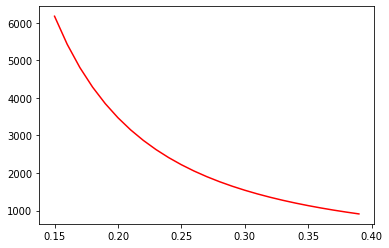

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

def coulomb(e1, e2, r):
    f = 138.9
    return f*np.divide(e1*e2, r*r)

e1 = 1.0
e2 = 1.0

r = 0.4

rs = np.arange(0.15, 0.4, 0.01)
cs = coulomb(e1, e2, rs)

plt.plot(rs, cs, 'r')
plt.show()

In [15]:
rs

array([0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22, 0.23, 0.24, 0.25,
       0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33, 0.34, 0.35, 0.36,
       0.37, 0.38, 0.39])

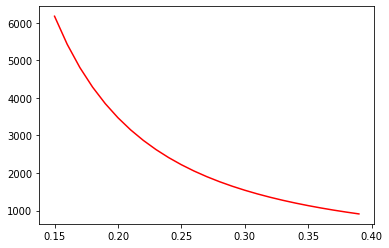

In [20]:


import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

def coulomb(e1, e2, r):
    f = 138.9
    return f*np.divide(e1*e2, r*r)

e1 = 1.0
e2 = 1.0

r = 0.4

rs = np.arange(0.15, 0.4, 0.01)
cs = coulomb(e1, e2, rs)

plt.plot(rs, cs, 'r')
plt.show()



# Incorporandolo a velocity verlet

In [ ]:
def vv_posicion(x, v, F, m, dt):
    
    x_next = x + v*dt + np.divide(F, 2*m)*np.power(dt, 2)
    
    return x_next

def vv_velocidad(v, F_anterior, F_actual, m, dt):
    
    v_next = v + np.divide(F_anterior + F_actual, 2*m)*dt
    
    return v_next

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline


def coulomb(e1, e2, r):
    f = 138.9
    return f*np.divide(e1*e2, r*r)

def vv_posicion(x, v, F, m, dt):
    x_next = x + v*dt + np.divide(F, 2*m)*np.power(dt, 2)
    return x_next

def vv_velocidad(v, F_anterior, F_actual_b, m, dt):
    v_next = v + np.divide(F_anterior + F_actual_b, 2*m)*dt
    return v_next


m1 = 22.98
m2 = 35.45

e1 = 1.0
e2 = -1.0

dt = 0.01
pasos = 1000

# creando diccionario
sol = {}
sol['x'] = {}
sol['y'] = {}
sol['z'] = {}

sol['vx'] = {}
sol['vy'] = {}
sol['vz'] = {}

sol['fx'] = {}
sol['fy'] = {}
sol['fz'] = {}

sol['t'] = {}

# agregando los valores iniciales
idx = 0
sol['x'][idx] = x0 
sol['y'][idx] = y0
sol['z'][idx] = z0

sol['vx'][idx] = vx0
sol['vy'][idx] = vy0
sol['vz'][idx] = vz0

sol['fx'][idx] = 0.0
sol['fy'][idx] = 0.0
sol['fz'][idx] = 0.0 

sol['t'][idx] = t0

for i in range(pasos):
    
    x = sol['x'][idx]
    v = sol['vx'][idx]
    fa = sol['fx'][idx]
    
    x = vv_posicion(x, v, F, m, dt) 
    
    fb = coulomb(e1, e2, r)
    
    v = vv_velocidad(v, fa, fb, m, dt)
    
    idx+=1
    t+=dt
    
    sol['x'][idx] = x
    sol['vx'][idx] = vx
    sol['fx'][idx] = fb
    sol['t'][idx] = t
    
    # OJO NO TERMINADO, ESTO ES EN GENERAL
    



In [21]:
# agregar latex

In [22]:
import numpy as np

def coulomb(qi, qj, ri, rj):
    f = 138.935
    
    rij = np.subtract(rj, ri)
    
    # cambiar despues ojo
    rij3 = np.power(np.linalg.norm(rij), 3)
    
    
    return f*np.divide(qi*qj, rij3)*rij

In [22]:


import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

def coulomb(qi, qj, ri, rj):
    f = 138.935
    rij = np.subtract(rj, ri)
    rij3 = np.power(np.linalg.norm(rij), 3)
    return f*np.divide(qi*qj, rij3)*rij

def vv_posicion(x, v, F, m, dt):
    x_next = x + v*dt + np.divide(F, 2*m)*np.power(dt, 2)
    return x_next

def vv_velocidad(v, F_anterior, F_actual, m, dt):
    v_next = v + np.divide(F_anterior + F_actual, 2*m)*dt
    return v_next


mi = 22.989    # 
mj = 35.453    #

qi = 1.0       # 
qj = 1.0       # 

dt = 0.01
pasos = 1000

# creamos diccionario
sol = {}
coords = ['x', 'y', 'z']
vels = ['vx', 'vy', 'vz']
fs = ['fx', 'fy', 'fz']

keys = coords
keys.extend(vels)
keys.extend(fs)
keys.append('t')

for key in keys:
    sol[key] = {}
    

idx = 0
x0, y0, z0 = -5.0, 1.0, 0.0
vx0, vy0, vz0 = 3.0, 0.0, 0.0 
fx0, fy0, fz0 = 0.0, 0.0, 0.0
t0 = 0.0

sol['x'][idx] = x0
sol['y'][idx] = y0
sol['z'][idx] = z0

sol['vx'][idx] = vx0
sol['vy'][idx] = vy0
sol['vz'][idx] = vz0

sol['fx'][idx] = fx0
sol['fy'][idx] = fy0
sol['fz'][idx] = fz0

sol['t'][idx] = t0

for i in range(pasos):
    
    # llamar valores anteriores
    x = sol['x'][idx]
    y = sol['y'][idx]
    z = sol['z'][idx] 

    vx = sol['vx'][idx]
    vy = sol['vy'][idx] 
    vz = sol['vz'][idx] 

    fxa = sol['fx'][idx]
    fya = sol['fy'][idx]
    fza = sol['fz'][idx]
    
    t = sol['t'][idx]
    
    # parte de velocity verlet
    x = vv_posicion(x, vx, fxa, mi, dt)
    y = vv_posicion(y, vy, fya, mi, dt)
    z = vv_posicion(z, vz, fza, mi, dt)
    
    ri = [x, y, z]
    fc = (-1)*coulomb(qi, qj, ri, [0.0, 0.0, 0.0])
    
    fxb = fc[0]
    fyb = fc[1]
    fzb = fc[2]

    vx = vv_velocidad(vx, fxa, fxb, mi, dt)    
    vy = vv_velocidad(vy, fya, fyb, mi, dt)    
    vz = vv_velocidad(vz, fza, fzb, mi, dt)
    
    # evolucionames siguiente paso
    idx+=1
    t = t + dt
    
    sol['x'][idx] = x
    sol['y'][idx] = y
    sol['z'][idx] = z

    sol['vx'][idx] = vx
    sol['vy'][idx] = vy
    sol['vz'][idx] = vz

    sol['fx'][idx] = fxb
    sol['fy'][idx] = fyb
    sol['fz'][idx] = fzb
    
    sol['t'][idx] = t
    
    
    
df = pd.DataFrame(sol)
df.head()



,x,y,z,vx,vy,vz,fx,fy,fz,t
0,-5.000000,1.000000,0.0,3.000000,0.000000,0.0,0.000000,0.000000,0.0,0.00
1,-4.970000,1.000000,0.0,2.998847,0.000232,0.0,-5.299630,1.066324,-0.0,0.01
2,-4.940023,1.000005,0.0,2.996529,0.000700,0.0,-5.360332,1.085087,-0.0,0.02
3,-4.910069,1.000014,0.0,2.994184,0.001176,0.0,-5.422007,1.104278,-0.0,0.03
4,-4.880139,1.000028,0.0,2.991812,0.001661,0.0,-5.484677,1.123909,-0.0,0.04


In [9]:
type(df['x'])

pandas.core.series.Series

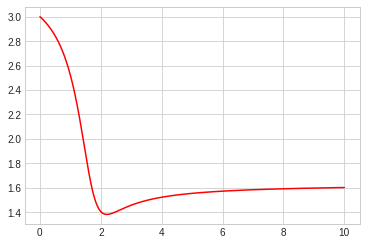

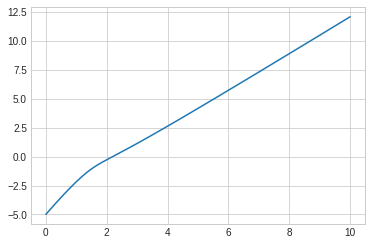

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

x = df['x'].values
vx = df['vx'].values
t = df['t'].values

plt.plot(t, vx, 'r')
plt.show()
plt.plot(t, x)
plt.show()

In [26]:
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
plt.style.use('seaborn-whitegrid')
%matplotlib tk

fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
colors = np.array([0.1, 0.4])
sizes = 1000*np.array([1.0, 2.0])

Lx = 5.0
Ly = Lx

xj = 0.0
yj = 0.0

def animateee(i):
    x = [sol['x'][i], xj]
    y = [sol['y'][i], yj]

    ax1.clear()
    plt.scatter(x, y, c=colors, s=sizes, alpha=0.7, cmap='viridis')
    plt.xlim(-Lx, Lx)
    plt.ylim(-Ly, Ly)
    
#     print(i)


ani = FuncAnimation(fig, func=animateee, frames=np.arange(0, pasos, 10), interval=1)
    

# Agregar condiciones periodicas

### funcion modulo

In [29]:
4 % 3 # funcion modulo 

1

In [30]:
np.mod(4, 3)

1

In [32]:
Lx = 3
pos_particula = -1
np.mod(pos_particula, Lx)

2

In [37]:


import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
import pandas as pd
import numpy as np
plt.style.use('seaborn-whitegrid')
import numpy as np
%matplotlib tk

def coulomb(qi, qj, ri, rj):
    f = 138.935
    rij = np.subtract(rj, ri)
    rij3 = np.power(np.linalg.norm(rij), 3)
    return f*np.divide(qi*qj, rij3)*rij

def vv_posicion(x, v, F, m, dt):
    x_next = x + v*dt + np.divide(F, 2*m)*np.power(dt, 2)
    return x_next

def vv_velocidad(v, F_anterior, F_actual, m, dt):
    v_next = v + np.divide(F_anterior + F_actual, 2*m)*dt
    return v_next


mi = 22.989    # sodio
mj = 35.453    # cloro

qi = 1.0       # sodio
qj = 1.0       # cloro

dt = 0.01
pasos = 1000

sol = {}
coords = ['x', 'y', 'z']
vels = ['vx', 'vy', 'vz']
fs = ['fx', 'fy', 'fz']

keys = coords
keys.extend(vels)
keys.extend(fs)
keys.append('t')

for key in keys:
    sol[key] = {}

idx = 0
Lx, Ly, Lz = 5.0, 5.0, 5.0
xj, yj, zj = Lx/2, Ly/2, Lz/2

x0, y0, z0 = 0.0, Ly/2  + 0.0, Lz/2
vx0, vy0, vz0 = 3.0, 0, 0 
fx0, fy0, fz0 = 0, 0, 0
t0 = 0.0

sol['x'][idx] = x0
sol['y'][idx] = y0
sol['z'][idx] = z0

sol['vx'][idx] = vx0
sol['vy'][idx] = vy0
sol['vz'][idx] = vz0

sol['fx'][idx] = fx0
sol['fy'][idx] = fy0
sol['fz'][idx] = fz0

sol['t'][idx] = t0

for i in range(pasos):
    
    x = sol['x'][idx]
    y = sol['y'][idx]
    z = sol['z'][idx] 

    vx = sol['vx'][idx]
    vy = sol['vy'][idx] 
    vz = sol['vz'][idx] 

    fxa = sol['fx'][idx]
    fya = sol['fy'][idx]
    fza = sol['fz'][idx]
    
    t = sol['t'][idx]

    x = np.mod(vv_posicion(x, vx, fxa, mi, dt), Lx)
    y = np.mod(vv_posicion(y, vy, fya, mi, dt), Ly)
    z = np.mod(vv_posicion(z, vz, fza, mi, dt), Lz)
    
    ri = [x, y, z]
    fc = (-1)*coulomb(qi, qj, ri, [xj, yj, zj])
    
    fxb = fc[0]
    fyb = fc[1]
    fzb = fc[2]

    vx = vv_velocidad(vx, fxa, fxb, mi, dt)    
    vy = vv_velocidad(vy, fya, fyb, mi, dt)    
    vz = vv_velocidad(vz, fza, fzb, mi, dt)
    
    idx+=1
    t = t + dt
    
    sol['x'][idx] = x
    sol['y'][idx] = y
    sol['z'][idx] = z

    sol['vx'][idx] = vx
    sol['vy'][idx] = vy
    sol['vz'][idx] = vz

    sol['fx'][idx] = fxb
    sol['fy'][idx] = fyb
    sol['fz'][idx] = fzb
    
    sol['t'][idx] = t
    
    
df = pd.DataFrame(sol)

fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
colors = np.array([0.1, 0.4])
sizes = 1000*np.array([1.0, 2.0])

def animate(i):
    x = [sol['x'][i], xj]
    y = [sol['y'][i], yj]

    ax1.clear()
    plt.scatter(x, y, c=colors, s=sizes, alpha=0.5, cmap='viridis')
    plt.xlim(0, Lx)
    plt.ylim(0, Ly) 


ani = FuncAnimation(fig, func=animate, frames=np.arange(0, pasos, 10), interval=1)

